# Principal Component Analysis (PCA)

# Table of Contents
1. [Introduction](#introduction)
2. [Mathematical Foundations](#mathematical-foundations)
3. [Learning Algorithm](#learning-algorithm)
    - [Define the PCA class](#define-the-pca-class)
    - [Showcase the above PCA Class in Lung Cancer Dataset](#showcase-the-above-pca-class-in-lung-cancer-dataset)
    - [Use the PCA class provided by Scikit-Learn in breast cancer dataset](#use-the-pca-class-provided-by-scikit-learn-in-breast-cancer-dataset)
4. [Pros and Cons](#pros-and-cons)
5. [Suitable Tasks and Datasets](#suitable-tasks-and-datasets)
6. [References](#references)


## Introduction

Principal Component Analysis (PCA) is a statistical procedure and dimensionality reduction technique that has been extensively applied in various fields of machine learning and data analysis. Introduced by Karl Pearson in 1901 and later extended by Harold Hotelling in 1933, PCA plays a crucial role in preprocessing high-dimensional data, visualizing complex data structures, and reducing noise.

The core idea of PCA is to project the data onto a lower-dimensional space, such that the greatest possible amount of variance in the data is preserved. Initially, PCA was developed as a transformation method to convert observations of possibly correlated variables into a set of linearly uncorrelated variables known as principal components. This transformation is valuable as it often reveals internal structure in the data that was not immediately apparent in the high-dimensional space.

In a nutshell, PCA is an efficient tool that helps deal with high-dimensionality in datasets, making it easier to extract important information while minimizing information loss.

## Mathematical Foundations


PCA is based on linear algebra and specifically on the operation of eigen decomposition or singular value decomposition of a matrix. 

Given a $d$-dimensional dataset, the goal is to find a $k$-dimensional subspace (where $k<d$) that captures the most variance in the data. This is done by projecting the original data points onto this subspace. 

The $k$ dimensions (or axes) of this subspace are vectors called principal components. These are found by solving the following optimization problem (variance maximization problem):

$$
\max_{\mathbf{w}} \: \mathbf{w}^T \mathbf{S} \mathbf{w} \quad \text{s.t.} \quad \mathbf{w}^T \mathbf{w} = 1
$$

In this equation:

- $\mathbf{w}$ is the weight vector that we are trying to find. This vector will become the principal component.

- $\mathbf{S}$ is the sample covariance matrix of the data. The covariance matrix provides a measure of how much each of the dimensions/variances of the input dataset 'vary together', which is calculated as follows:

    $$
    \mathbf{S} = \frac{1}{N-1} \sum_{i=1}^{N} (\mathbf{x}_i - \bar{\mathbf{x}})(\mathbf{x}_i - \bar{\mathbf{x}})^T
    $$

    where:

    - $N$ is the number of samples in the dataset.
    - $\mathbf{x}_i$ represents each individual data point in the dataset.
    - $\bar{\mathbf{x}}$ is the mean vector of the dataset, calculated as $\bar{\mathbf{x}} = \frac{1}{N} \sum_{i=1}^{N} \mathbf{x}_i$.

    The covariance matrix $\mathbf{S}$ is a $d \times d$ matrix (where $d$ is the number of dimensions/features in your data), and each element $S_{ij} = \frac{1}{N-1} \sum_{n=1}^{N} (x_{ni} - \bar{x}_i)(x_{nj} - \bar{x}_j)$ in this matrix is the covariance between the $i^{th}$ and $j^{th}$ dimensions of the data. The diagonal elements of the covariance matrix ($S_{ii}$) are the variances of individual dimensions.


- $\mathbf{w}^T \mathbf{S} \mathbf{w}$ is the variance of the data along the direction of $\mathbf{w}$. We want to maximize this variance, as we're seeking the direction (or principal component) that retains the maximum possible information from the original data.

- The condition $\mathbf{w}^T \mathbf{w} = 1$ is a constraint that ensures that $\mathbf{w}$ is a unit vector (i.e., its length is 1). This prevents trivial solutions, such as increasing the length of $\mathbf{w}$ to artificially inflate the variance.

The principal components are ordered by their corresponding `eigenvalues` which represent the amount of variance captured by each principal component. Thus, the first principal component is the direction in the data that captures the most variance, the second principal component (which is orthogonal to the first) captures the second most variance, and so on. We compute the eigenvalues ($\lambda$) and eigenvectors ($\mathbf{v}$) of the sample covariance matrix ($\mathbf{S}$), which satisfy the following equation:

$$
\mathbf{S}\mathbf{v} = \lambda\mathbf{v}
$$

Again, the eigenvalues represent the variance (information) along the new feature axes, while the eigenvectors represent the directions of these new axes. The eigenvector $\mathbf{v}$ must be non-zero.


## Learning Algorithm

The learning algorithm for PCA consists of the following steps:

1. Standardize the dataset (mean = 0, standard deviation = 1) to ensure equal importance of all features.
2. Calculate the covariance matrix of the standardized dataset.
3. Compute the eigenvalues and eigenvectors of the covariance matrix.
4. Sort the eigenvalues in descending order and select the top k eigenvectors.
5. Project the original data onto the lower-dimensional space spanned by the top k eigenvectors.

### Define the PCA class

In [59]:
import numpy as np

class PCA:
    """
    Principal Component Analysis (PCA) implementation.

    Attributes:
        n_components (int): The number of components to keep.

    Methods:
        standardize(X): Standardizes the features in the dataset.
        fit_transform(X): Fits the model with X and apply the dimensionality reduction on X.
    """
    
    def __init__(self, n_components):
        self.n_components = n_components

    def standardize(self, X):
        """
        Standardizes the features in the dataset.

        Parameters:
            X (numpy.ndarray): The dataset to standardize.

        Returns:
            numpy.ndarray: The standardized dataset.
        """
        # Standardize by subtracting mean and dividing by standard deviation
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0)
        return (X - mean) / std

    def fit_transform(self, X):
        """
        Fits the model with X and apply the dimensionality reduction on X.

        Parameters:
            X (numpy.ndarray): The input data to fit and transform.

        Returns:
            numpy.ndarray: Transformed data.
        """
        # Standardize the input dataset
        X_standardized = self.standardize(X)

        # Calculate the covariance matrix
        covariance_matrix = np.cov(X_standardized.T)

        # Compute the eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

        # Sort the eigenvalues and eigenvectors in descending order
        sorted_indices = np.argsort(eigenvalues)[::-1]
        sorted_eigenvalues = eigenvalues[sorted_indices]
        sorted_eigenvectors = eigenvectors[:, sorted_indices]

        # Select the top n_components eigenvectors
        top_eigenvectors = sorted_eigenvectors[:, :self.n_components]

        # Project the data onto the lower-dimensional space
        X_reduced = X_standardized.dot(top_eigenvectors)
        return X_reduced


### Showcase the above PCA Class in Lung Cancer dataset

Here we use PCA to visulization high demontional dataset in 2D space. The lung cancer dataset contains 116 lung adenocarcinoma (LUAD) samples (paired normal and tumor samples) and 1219 immune marker gene expressions. I downloaded the original data from [TCGA database](https://gdac.broadinstitute.org/), selected paired samples, filtered immune marker genes and reorganized the data into a csv file. 

We use PCA to reduce the dimension of the dataset to 2D and plot the data in 2D space. The goal is to see if we can find any pattern in the data.

In [60]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
# Load the dataset
data = pd.read_csv("../../data/lung_cancer/RSEM_gene_expression.csv")
label = pd.read_csv("../../data/lung_cancer/label.csv")

In [62]:
# Data overview
data

,Gene,TCGA.38.4625.11A.01R.1758.07,TCGA.38.4626.11A.01R.1758.07,TCGA.38.4627.11A.01R.1758.07,TCGA.38.4632.11A.01R.1755.07,TCGA.44.2655.11A.01R.1758.07,TCGA.44.2657.11A.01R.1758.07,TCGA.44.2661.11A.01R.1758.07,TCGA.44.2662.11A.01R.1758.07,TCGA.44.2665.11A.01R.1758.07,...,TCGA.55.6985.01A.11R.1949.07,TCGA.55.6986.01A.11R.1949.07,TCGA.73.4676.01A.01R.1755.07,TCGA.91.6828.01A.11R.1858.07,TCGA.91.6829.01A.21R.1858.07,TCGA.91.6831.01A.11R.1858.07,TCGA.91.6835.01A.11R.1858.07,TCGA.91.6836.01A.21R.1858.07,TCGA.91.6847.01A.11R.1949.07,TCGA.91.6849.01A.11R.1949.07
0,ABAT,2.749067,2.818563,2.130852,2.675901,2.476561,2.546046,2.501046,2.458168,2.501574,...,2.597450,2.373767,1.797554,3.057824,2.856802,2.216461,2.535563,2.154110,1.690002,2.386484
1,ABCA1,3.074937,3.101565,2.696561,3.709566,3.396422,3.191824,3.383607,3.140389,3.264245,...,3.220674,3.057662,2.846861,3.415727,3.449180,3.017885,3.446460,2.977237,2.556070,2.845511
2,ABCB1,1.658831,1.590477,1.924151,1.897917,2.622722,1.972072,2.201384,1.822796,2.100671,...,1.891346,2.100371,1.393517,1.986591,1.826603,1.553020,2.267638,1.238575,0.948516,1.943312
3,ABCB4,0.559032,0.759169,0.499027,0.889038,0.855113,1.722575,1.182808,0.680961,0.616570,...,1.713879,0.953963,1.183213,1.459058,1.551323,1.382964,2.076584,1.478760,0.307089,1.424620
4,ABCC4,2.905619,2.722539,2.759940,2.854329,2.801860,3.006077,2.871298,2.943532,3.078281,...,2.794759,2.375100,2.804779,3.117803,2.909029,2.871238,3.101818,3.042187,3.683577,3.414880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1214,ZNF528,2.280087,2.327623,2.156074,2.139354,2.415254,2.281253,2.429098,2.271950,2.323780,...,2.519632,2.633245,1.934298,2.356850,2.566530,2.234410,2.395947,2.185212,2.803707,1.726567
1215,ZNF609,2.888922,2.956729,2.711820,2.788068,3.192098,3.126805,3.220777,3.207828,3.231149,...,3.045305,3.190652,2.898162,3.339352,3.089801,3.279700,3.250146,3.164412,2.975339,3.013741
1216,ZNF747,2.472255,2.467453,2.426196,2.391035,2.459334,2.424700,2.388485,2.366936,2.417614,...,2.399002,2.461424,2.221067,2.313281,2.268880,2.731375,2.260830,2.187494,2.334461,2.303773
1217,ZNF764,2.230390,2.231224,2.069597,2.017479,2.348671,2.312443,2.221640,2.098115,2.242709,...,2.413650,2.266858,1.928933,2.275796,2.132722,2.623314,2.330602,2.421444,2.176307,2.192055


In [63]:
# label overview
label

,Disease,Class,Patient,ID
0,normal,0,1,TCGA.38.4625.11A.01R.1758.07
1,normal,0,2,TCGA.38.4626.11A.01R.1758.07
2,normal,0,3,TCGA.38.4627.11A.01R.1758.07
3,normal,0,4,TCGA.38.4632.11A.01R.1755.07
4,normal,0,5,TCGA.44.2655.11A.01R.1758.07
...,...,...,...,...
111,tumor,1,54,TCGA.91.6831.01A.11R.1858.07
112,tumor,1,55,TCGA.91.6835.01A.11R.1858.07
113,tumor,1,56,TCGA.91.6836.01A.21R.1858.07
114,tumor,1,57,TCGA.91.6847.01A.11R.1949.07


In [64]:
# Remove the first column and transpose the data
X = data.iloc[:, 1:].T.values
y = label['Class'].values
print("X Shape", X.shape)
print("y Shape", y.shape)

X Shape (116, 1219)
y Shape (116,)


In [65]:
# Apply PCA to the dataset, reducing the dimensionality to 2
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
print("Shape", X_reduced.shape)

Shape (116, 2)


/Users/cli15/Desktop/INDE577/DataScience-MachineLearning/.venv/lib/python3.9/site-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


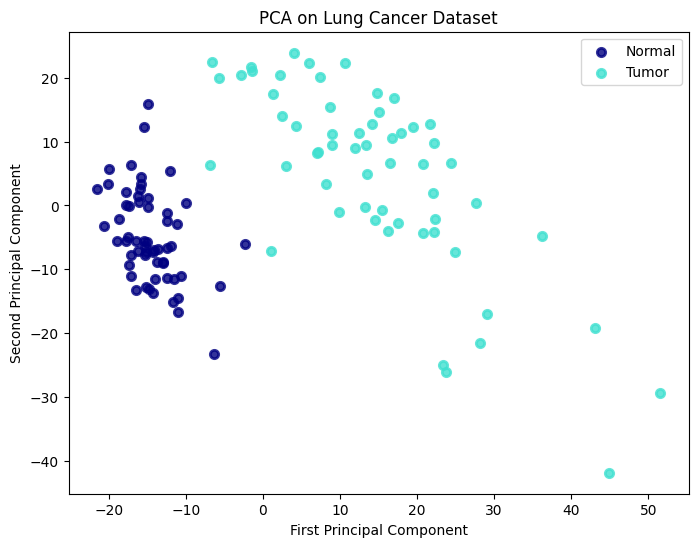

In [66]:
# Visualize the data in the reduced dimension
plt.figure(figsize=(8, 6))

# Assign colors to each class in the data set
colors = ['navy', 'turquoise']

# Define class labels
target_names = ['Normal', 'Tumor']

# Plot each class separately
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], color=color, alpha=0.8, lw=2, label=target_name)

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA on Lung Cancer Dataset')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.show()


In the plot, each point in the plot represents a patient's lung tissue sample. The location of the point is determined by the first and second principal components (PC1 and PC2) which are the two axes of the plot. 

From the PCA plot, we observe that the 'Normal' and 'Tumor' classes are distinct and form separate clusters, indicating that these two classes have different gene expression patterns. This suggests that PCA is able to effectively reduce the dimensionality of the data while preserving the differences in gene expressions between 'Normal' and 'Tumor' tissues.

Further, the distance between the clusters might give an indication of the degree of difference between the 'Normal' and 'Tumor' gene expression patterns. A larger distance might suggest a greater difference in gene expression patterns, and thus possibly a more advanced or different type of tumor. Conversely, a smaller distance might suggest a smaller difference in gene expression patterns, indicating possibly a less advanced tumor or one that is more similar to normal tissue.

Finally, the spread of the points within each cluster indicates the amount of variation within each class. A larger spread might suggest a higher degree of heterogeneity within that class in terms of gene expression patterns.


### Use the PCA class provided by Scikit-Learn in breast cancer dataset


The Breast Cancer dataset is a classic and very easy binary classification dataset. It contains 569 instances, 212 malignant and 357 benign. Each instance contains the measurements of 30 different features, all real-valued numerical features that have been computed from digitized images of fine needle aspirates (FNA) of breast masses. These features describe characteristics of the cell nuclei present in the image. 

[PCA()](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) is the class provided by Scikit-Learn for PCA. It has a `fit()` method that takes the training data as input and learns the principal components from the data. It also has a `transform()` method that takes the training data and the number of principal components as input and returns the transformed data (i.e., the data projected onto the principal components).

Here we use PCA to reduce the dimension of the dataset to 2D and plot the data in 2D space. The goal is to see if we can find any pattern in the data.

In [67]:
# Delete all previous variables
for _ in locals().copy():
    if _.startswith('__') or _.startswith('_'):
        continue
    del locals()[_]

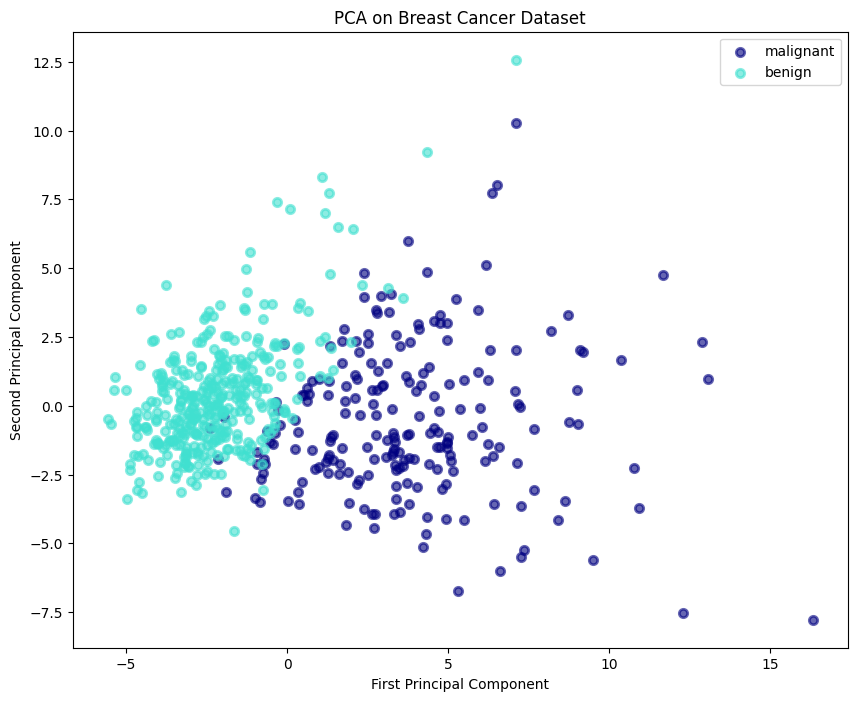

In [68]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target
target_names = data.target_names

# Standardize the dataset
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)  # We reduce the data to 2D for visualization
X_pca = pca.fit_transform(X)

# Visualize the data in the reduced dimension
plt.figure(figsize=(10, 8))

for color, i, target_name in zip(['navy', 'turquoise'], [0, 1], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=0.6, lw=2, label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA on Breast Cancer Dataset')
plt.show()

## Pros and Cons

**Pros:**
- Reduces the dimensionality of the data, which can help overcome the curse of dimensionality and improve the performance of machine learning algorithms.
- Can help visualize high-dimensional data.
- Removes multicollinearity between features and improves interpretability of the results.
- Can be used for noise reduction in the data.

**Cons:**
- Assumes that the principal components are linear combinations of the original features.
- Loss of information due to the reduction in dimensionality.
- Sensitive to the scaling of the features.

## Suitable Tasks and Datasets

PPCA is suitable for a wide variety of tasks and datasets. Here are a few examples:

1. **Data Preprocessing**: PCA can be used as a preprocessing step in machine learning pipelines to reduce the dimensionality of the data. This can help mitigate the curse of dimensionality and reduce the risk of overfitting. This is particularly useful for datasets with a large number of features, i.e., high-dimensional datasets.

2. **Noise Reduction**: PCA can be used to denoise data by projecting it onto a lower-dimensional space, which can effectively reduce the effect of noise variables.

3. **Visualization**: PCA can be used to visualize high-dimensional data by projecting it onto a 2 or 3-dimensional space. This is helpful for datasets where it's important to understand the structure and relationships in the data.

4. **Anomaly Detection**: In some cases, outliers or anomalies will become more apparent when visualized in the lower-dimensional space created by PCA.

5. **Data Compression**: PCA can be used to compress data, reducing its storage requirements and speeding up learning algorithms.

6. **Feature Extraction**: PCA can also be used for feature extraction. By transforming the original variables to a new set of variables, which are the principal components, PCA can extract the most important information from the dataset. These new variables are linear combinations of the original variables and can sometimes be more interpretable.

Common datasets where PCA might be used include image datasets, text datasets (after converting the text into a set of numerical features), gene expression and any dataset with a large number of features. However, PCA assumes a linear relationship among variables. If this assumption is violated, the results may not be reliable.


## References

1. Pearson, K. (1901). LIII. On lines and planes of closest fit to systems of points in space. The London, Edinburgh, and Dublin philosophical magazine and journal of science, 2(11), 559-572.
2. Hotelling, H. (1933). Analysis of a complex of statistical variables into principal components. Journal of educational psychology, 24(6), 417.
3. Scikit-Learn: Principal Component Analysis. https://scikit-learn.org/stable/modules/decomposition.html#pca
4. Géron, A. (2022). Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow. " O'Reilly Media, Inc.".
5. The results shown here are in whole or part based upon data generated by the TCGA Research Network: https://www.cancer.gov/tcga.